In [54]:
import warnings
warnings.filterwarnings("ignore")

In [55]:
import pandas as pd 

data = pd.read_csv(r'C:\Users\jayle\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition (1)\ObesityDataSet_raw_and_data_sinthetic.csv')

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Check for missing values and summary statistics
missing_values = data.isnull().sum()
summary_stats = data.describe(include='all')

# Convert numerical columns to numeric types
numerical_columns = ["Age", "Height", "CH2O", "FAF", "TUE", "NCP", "FCVC"]

for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

missing_values, summary_stats

(Gender                            0
 Age                               0
 Height                            0
 Weight                            0
 family_history_with_overweight    0
 FAVC                              0
 FCVC                              0
 NCP                               0
 CAEC                              0
 SMOKE                             0
 CH2O                              0
 SCC                               0
 FAF                               0
 TUE                               0
 CALC                              0
 MTRANS                            0
 NObeyesdad                        0
 dtype: int64,
        Gender          Age       Height       Weight  \
 count    2111  2111.000000  2111.000000  2111.000000   
 unique      2          NaN          NaN          NaN   
 top      Male          NaN          NaN          NaN   
 freq     1068          NaN          NaN          NaN   
 mean      NaN    24.312600     1.701677    86.586058   
 std       NaN

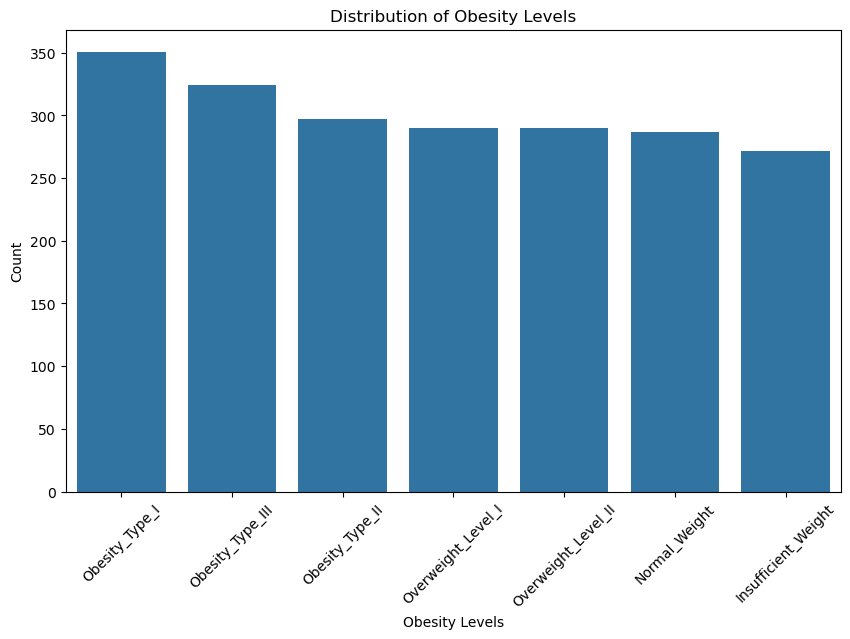

In [57]:
# Encode the target variable 'NObeyesdad'
label_encoder = LabelEncoder()
data['NObeyesdad_encoded'] = label_encoder.fit_transform(data['NObeyesdad'])
# Encode categorical features

categorical_columns = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]

for col in categorical_columns:
    data[col] = data[col].astype("category").cat.codes


# Visualize the distribution of obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="NObeyesdad", order=data["NObeyesdad"].value_counts().index)
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Use 'Weight' as the target variable
X = data[numerical_columns + categorical_columns].drop(columns=['Weight'], errors='ignore')
y = data['Weight']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Function to evaluate regression models
def evaluate_regression_model(model, X_test, y_test, predictions):
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100  # Calculate MAPE
    print(f"{model.__class__.__name__} Results:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, predictions))
    print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))
    print("R-Squared (R²):", r2_score(y_test, predictions))
    print("Mean Absolute Percentage Error (MAPE):", f"{mape:.2f}%")
    print("-" * 50)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)
evaluate_regression_model(linear_model, X_test, y_test, linear_predictions)

# Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)
evaluate_regression_model(tree_model, X_test, y_test, tree_predictions)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
evaluate_regression_model(rf_model, X_test, y_test, rf_predictions)

# XGBoost Regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
evaluate_regression_model(xgb_model, X_test, y_test, xgb_predictions)


LinearRegression Results:
Mean Absolute Error (MAE): 14.176576691267291
Mean Squared Error (MSE): 312.661085381815
R-Squared (R²): 0.5628600314134603
Mean Absolute Percentage Error (MAPE): 18.28%
--------------------------------------------------
DecisionTreeRegressor Results:
Mean Absolute Error (MAE): 7.043174927444794
Mean Squared Error (MSE): 171.8108623195123
R-Squared (R²): 0.7597865597330067
Mean Absolute Percentage Error (MAPE): 9.43%
--------------------------------------------------
RandomForestRegressor Results:
Mean Absolute Error (MAE): 5.519428959290221
Mean Squared Error (MSE): 89.34673889231884
R-Squared (R²): 0.8750818939139726
Mean Absolute Percentage Error (MAPE): 7.43%
--------------------------------------------------
XGBRegressor Results:
Mean Absolute Error (MAE): 6.306181148155622
Mean Squared Error (MSE): 103.8129982304516
R-Squared (R²): 0.8548562232171745
Mean Absolute Percentage Error (MAPE): 8.45%
--------------------------------------------------


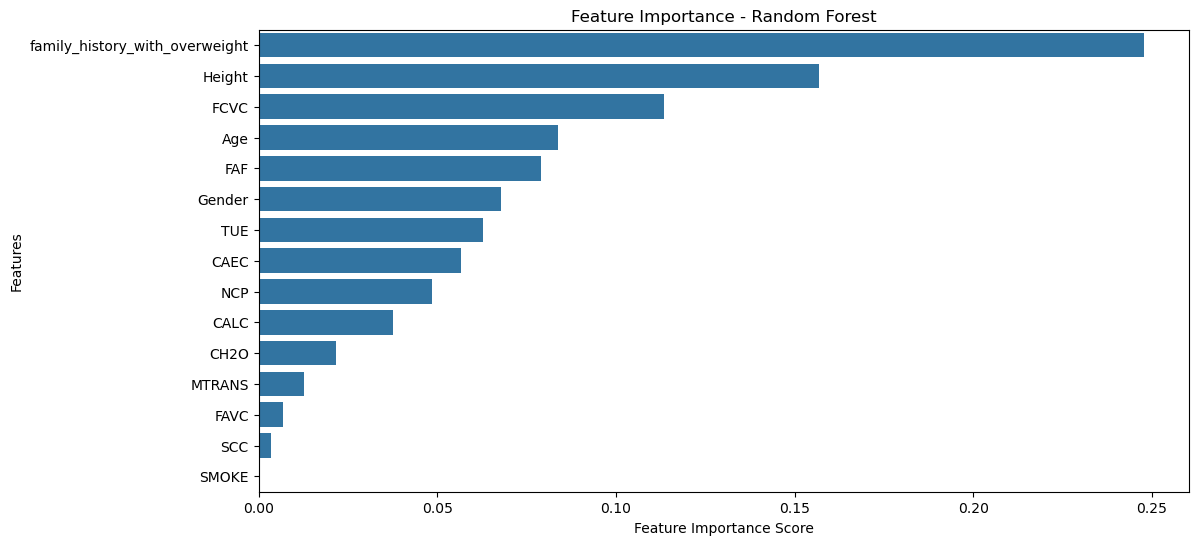

In [68]:
import numpy as np

# Get feature importances from Random Forest
feature_importances = rf_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = np.array(X.columns)[sorted_indices]

# Plot feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances[sorted_indices], y=sorted_features)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest")
plt.show()


In [70]:
import pandas as pd
import numpy as np

# Get feature names
feature_names = X_train.columns

# Get coefficients from trained Linear Regression model
coefficients = linear_model.coef_

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Sort by absolute value of the coefficient to see the most impactful variables
coefficients_df["Absolute Impact"] = coefficients_df["Coefficient"].abs()
coefficients_df = coefficients_df.sort_values(by="Absolute Impact", ascending=False)

coefficients_df


,Feature,Coefficient,Absolute Impact
1,Height,126.976767,126.976767
8,family_history_with_overweight,19.913219,19.913219
10,CAEC,11.337589,11.337589
6,FCVC,9.487723,9.487723
12,SCC,-6.227814,6.227814
9,FAVC,5.629211,5.629211
7,Gender,-4.931248,4.931248
13,CALC,-4.823068,4.823068
14,MTRANS,3.701295,3.701295
3,FAF,-3.237818,3.237818
